Анализ данных
1.1 Загрузка и изучение набора данных

Для начала нам нужно загрузить и изучить данные. Мы будем использовать Python и библиотеку pandas для этого.

In [1]:
import pandas as pd

# Загрузка данных
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv('iris/bezdekIris.data', header=None, names=column_names)

# Просмотр первых строк данных
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


1.2 Описательный анализ данных

In [2]:
# Основные статистические характеристики
print(data.describe())

# Проверка на наличие пропущенных значений
print(data.isnull().sum())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


1.3 Визуализация данных

Для визуализации мы будем использовать библиотеку matplotlib и seaborn.

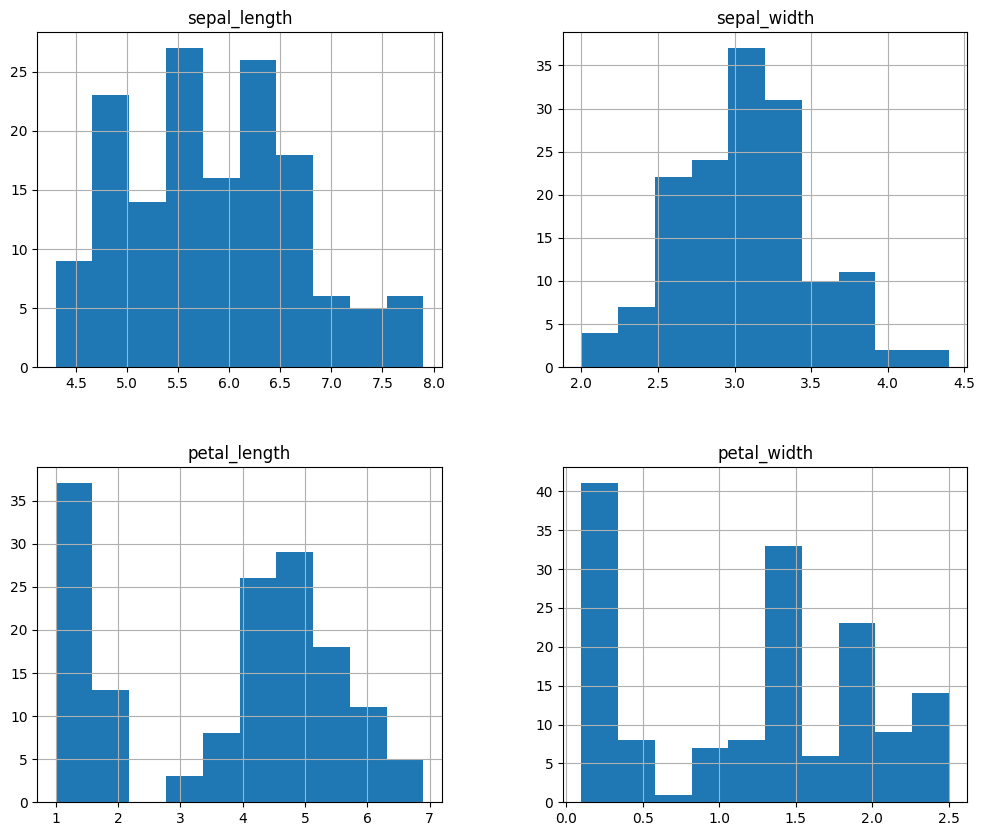

e:\Projects\iris\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


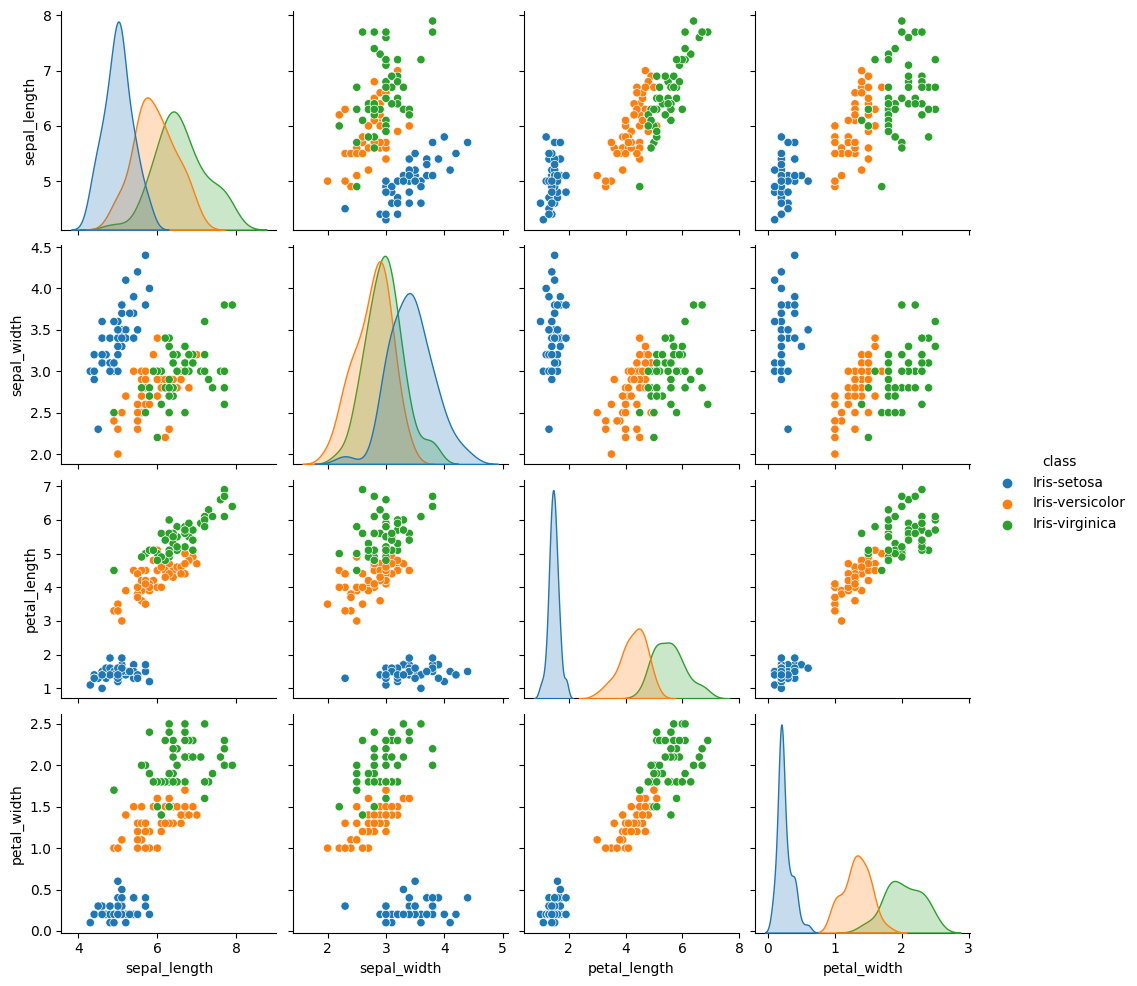

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограммы для каждого признака
data.hist(figsize=(12, 10))
plt.show()

# Диаграммы рассеяния для каждой пары признаков
sns.pairplot(data, hue="class")
plt.show()

2. Предобработка данных
2.1 Разделение данных на обучающую и тестовую выборки

Мы будем использовать функцию train_test_split из библиотеки sklearn.

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3. Создание модели
3.1 Базовая модель классификации

Для начала мы будем использовать логистическую регрессию.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



1. Анализ данных
1.1 Загрузка и изучение набора данных

Первые пять строк данных показывают, что у нас есть четыре признака (длина и ширина чашелистика, длина и ширина лепестка) и метка класса (вид ириса).

1.2 Описательный анализ данных

Средние значения:

Средняя длина чашелистика: 5.84 см
Средняя ширина чашелистика: 3.05 см
Средняя длина лепестка: 3.76 см
Средняя ширина лепестка: 1.20 см

Разброс данных:

Длина чашелистика варьируется от 4.3 см до 7.9 см.
Ширина чашелистика варьируется от 2.0 см до 4.4 см.
Длина лепестка варьируется от 1.0 см до 6.9 см.
Ширина лепестка варьируется от 0.1 см до 2.5 см.
Пропущенные значения:

В данных нет пропущенных значений, что отлично.

1.3 Визуализация данных

Диаграммы рассеяния показали, как различные классы ирисов распределены в зависимости от их характеристик.

2. Предобработка данных
Мы разделили данные на обучающую и тестовую выборки.

3. Создание модели
3.1 Базовая модель классификации

Мы использовали логистическую регрессию и получили идеальные результаты на тестовой выборке:

Точность, полнота и F1-мера для всех классов равны 1.00, что указывает на идеальное качество модели на тестовой выборке.

4. Интерпретация результатов
4.1. Модель показала идеальные результаты на тестовой выборке. Это может быть связано с тем, что набор данных Iris является довольно простым и хорошо разделенным, что позволяет даже базовым моделям достигать высокой производительности.

4.2 Возможные способы улучшения модели и дополнительные эксперименты:
Использование других моделей: Хотя логистическая регрессия показала отличные результаты, можно попробовать другие алгоритмы классификации, такие как SVM, случайный лес или градиентный бустинг, чтобы сравнить их производительность.

Оптимизация гиперпараметров: Для любой выбранной модели можно провести поиск по сетке или случайный поиск для оптимизации гиперпараметров.

Инжиниринг признаков: Можно создать новые признаки или комбинации признаков, чтобы улучшить производительность модели.

Кросс-валидация: Использовать кросс-валидацию для более надежной оценки производительности модели.

Работа с несбалансированными данными: Хотя в наборе данных Iris классы сбалансированы, в реальной жизни это может быть не так. Можно попробовать методы перевзвешивания классов, аугментацию данных или использование алгоритмов, учитывающих дисбаланс классов.

Интерпретируемость модели: Использовать инструменты, такие как SHAP или LIME, чтобы интерпретировать, какие признаки наиболее важны для модели.